# Strategy Comparison: Top Winning Strategies

This notebook compares the top performing strategies from the optimization output.

**Metrics Compared:**
- Active Return (Strategy Return - SPY Return)
- Information Ratio (risk-adjusted excess return)
- Sharpe Ratio
- Max Drawdown
- Tracking Error

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)
pd.set_option('display.precision', 4)

print("Setup complete!")

Setup complete!


## Load Optimization Results

Load the winners from the most recent optimization run.

In [10]:
# Find the most recent optimization directory
opt_dir = Path('../artifacts/optimization')
opt_runs = sorted([d for d in opt_dir.iterdir() if d.is_dir()], reverse=True)

# Find first directory with winners.csv
winners_file = None
for run_dir in opt_runs:
    wf = run_dir / 'winners.csv'
    if wf.exists():
        winners_file = wf
        break

if winners_file is None:
    raise FileNotFoundError("No winners.csv found in optimization artifacts")

print(f"Loading winners from: {winners_file}")

# Load all winners
winners = pd.read_csv(winners_file)
print(f"Total winning strategies: {len(winners)}")

# Select top N strategies by composite score
TOP_N = 10
top_strategies = winners.head(TOP_N).copy()

print(f"\nAnalyzing top {TOP_N} strategies by composite score")

Loading winners from: ../artifacts/optimization/20260124_044939/winners.csv
Total winning strategies: 93

Analyzing top 10 strategies by composite score


In [11]:
# Parse strategy names for cleaner display
def shorten_name(name):
    """Create abbreviated strategy name for display."""
    # Extract key components
    parts = []
    
    if 'momentum_acceleration' in name:
        parts.append('MomAccel')
    elif 'vol_adjusted_momentum' in name:
        parts.append('VolAdj')
    elif 'dual_momentum' in name:
        parts.append('DualMom')
    elif 'trend_filtered' in name:
        parts.append('TrendFilt')
    elif 'value_momentum' in name:
        parts.append('ValMom')
    elif 'momentum' in name:
        parts.append('Mom')
    else:
        parts.append(name[:10])
    
    # Extract lookback
    if 'long_lookback_days' in name:
        import re
        match = re.search(r'long_lookback_days(\d+)', name)
        if match:
            parts.append(f'L{match.group(1)}')
        match = re.search(r'short_lookback_days(\d+)', name)
        if match:
            parts.append(f'S{match.group(1)}')
    elif 'lookback_days' in name:
        import re
        match = re.search(r'lookback_days(\d+)', name)
        if match:
            parts.append(f'LB{match.group(1)}')
    
    # Extract top_n
    if '_top' in name:
        import re
        match = re.search(r'_top(\d+)_', name)
        if match:
            parts.append(f'T{match.group(1)}')
    
    # Extract schedule
    if '_monthly' in name:
        parts.append('M')
    elif '_weekly' in name:
        parts.append('W')
    
    return '_'.join(parts)

top_strategies['short_name'] = top_strategies['config_name'].apply(shorten_name)

# Add rank column for reference
top_strategies['rank'] = range(1, len(top_strategies) + 1)
top_strategies['label'] = top_strategies['rank'].astype(str) + '. ' + top_strategies['short_name']

# Create legend mapping short names to full names
print("=" * 130)
print("STRATEGY NAME LEGEND (Short Name -> Full Config Name)")
print("=" * 130)
print(f"{'Rank':<6} {'Short Name':<28} {'Full Strategy Name'}")
print("-" * 130)
for _, row in top_strategies.iterrows():
    print(f"{row['rank']:<6} {row['short_name']:<28} {row['config_name']}")
print("=" * 130)

# Display summary with full names
print("\n\nTop 10 Winning Strategies - Performance Summary:")
print("=" * 160)
summary = top_strategies[['config_name', 'composite_score', '1y_strategy_return',
                          '1y_spy_return', '1y_active_return', '1y_information_ratio']].copy()
summary.columns = ['Strategy (Full Name)', 'Score', 'Return', 'SPY', 'Active', 'IR']
summary['Return'] = (summary['Return'] * 100).round(1).astype(str) + '%'
summary['SPY'] = (summary['SPY'] * 100).round(1).astype(str) + '%'
summary['Active'] = (summary['Active'] * 100).round(1).astype(str) + '%'
summary['Score'] = summary['Score'].round(2)
summary['IR'] = summary['IR'].round(2)
summary.index = range(1, len(summary) + 1)
pd.set_option('display.max_colwidth', None)  # Show full column width
print(summary.to_string())

STRATEGY NAME LEGEND (Short Name -> Full Config Name)
Rank   Short Name                   Full Strategy Name
----------------------------------------------------------------------------------------------------------------------------------
1      MomAccel_L126_S63_T7_M       momentum_acceleration_long_lookback_days126_min_periods100_short_lookback_days63_top7_monthly
2      MomAccel_L126_S42_T5_M       momentum_acceleration_long_lookback_days126_min_periods50_short_lookback_days42_top5_monthly
3      MomAccel_L126_S42_T5_M       momentum_acceleration_long_lookback_days126_min_periods100_short_lookback_days42_top5_monthly
4      MomAccel_L126_S21_T3_M       momentum_acceleration_long_lookback_days126_min_periods50_short_lookback_days21_top3_monthly
5      MomAccel_L126_S21_T3_M       momentum_acceleration_long_lookback_days126_min_periods100_short_lookback_days21_top3_monthly
6      Mom_LB63_T5_M                momentum_lookback_days63_min_periods50_top5_monthly
7      MomAccel_L126_S42

## Performance Comparison Charts

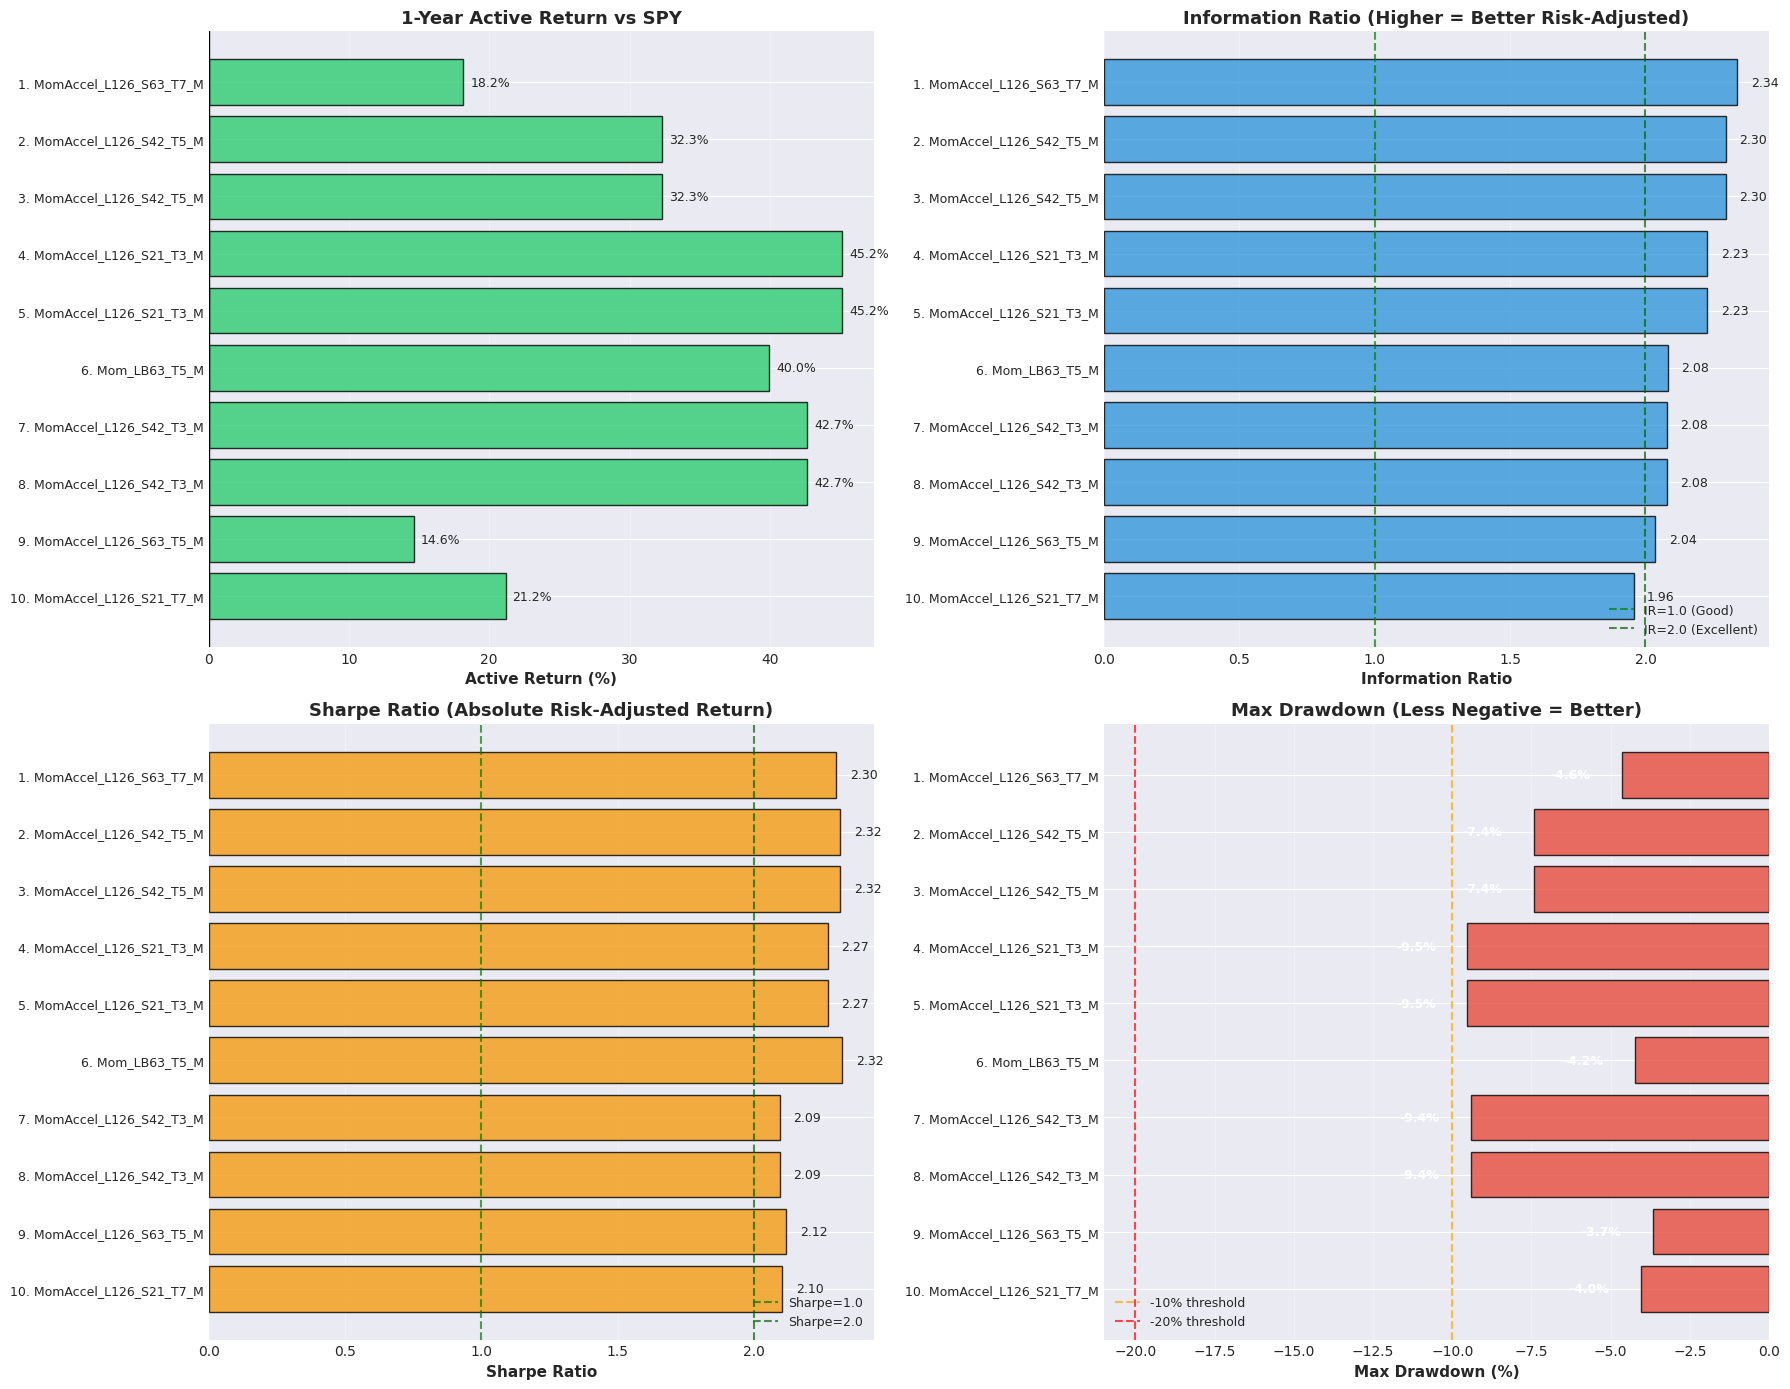


CHART LEGEND: Strategy Number -> Full Config Name
   1. momentum_acceleration_long_lookback_days126_min_periods100_short_lookback_days63_top7_monthly
   2. momentum_acceleration_long_lookback_days126_min_periods50_short_lookback_days42_top5_monthly
   3. momentum_acceleration_long_lookback_days126_min_periods100_short_lookback_days42_top5_monthly
   4. momentum_acceleration_long_lookback_days126_min_periods50_short_lookback_days21_top3_monthly
   5. momentum_acceleration_long_lookback_days126_min_periods100_short_lookback_days21_top3_monthly
   6. momentum_lookback_days63_min_periods50_top5_monthly
   7. momentum_acceleration_long_lookback_days126_min_periods50_short_lookback_days42_top3_monthly
   8. momentum_acceleration_long_lookback_days126_min_periods100_short_lookback_days42_top3_monthly
   9. momentum_acceleration_long_lookback_days126_min_periods100_short_lookback_days63_top5_monthly
  10. momentum_acceleration_long_lookback_days126_min_periods50_short_lookback_days21_top7_mon

In [12]:
# Create multi-panel bar chart comparison with legend
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

y_pos = range(TOP_N)
# Use numbered labels for cleaner display
strategy_labels = top_strategies['label'].tolist()

# 1. Active Return
ax1 = axes[0, 0]
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in top_strategies['1y_active_return']]
bars1 = ax1.barh(y_pos, top_strategies['1y_active_return'] * 100, color=colors, alpha=0.8, edgecolor='black')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(strategy_labels, fontsize=9)
ax1.set_xlabel('Active Return (%)', fontsize=11, fontweight='bold')
ax1.set_title('1-Year Active Return vs SPY', fontsize=13, fontweight='bold')
ax1.axvline(0, color='black', linestyle='-', linewidth=1)
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3, axis='x')
for bar, val in zip(bars1, top_strategies['1y_active_return']):
    ax1.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{val*100:.1f}%', va='center', fontsize=9)

# 2. Information Ratio
ax2 = axes[0, 1]
bars2 = ax2.barh(y_pos, top_strategies['1y_information_ratio'], color='#3498db', alpha=0.8, edgecolor='black')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(strategy_labels, fontsize=9)
ax2.set_xlabel('Information Ratio', fontsize=11, fontweight='bold')
ax2.set_title('Information Ratio (Higher = Better Risk-Adjusted)', fontsize=13, fontweight='bold')
ax2.axvline(1.0, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='IR=1.0 (Good)')
ax2.axvline(2.0, color='darkgreen', linestyle='--', linewidth=1.5, alpha=0.7, label='IR=2.0 (Excellent)')
ax2.invert_yaxis()
ax2.grid(True, alpha=0.3, axis='x')
ax2.legend(loc='lower right', fontsize=9)
for bar, val in zip(bars2, top_strategies['1y_information_ratio']):
    ax2.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, 
             f'{val:.2f}', va='center', fontsize=9)

# 3. Sharpe Ratio
ax3 = axes[1, 0]
bars3 = ax3.barh(y_pos, top_strategies['1y_sharpe_ratio'], color='#f39c12', alpha=0.8, edgecolor='black')
ax3.set_yticks(y_pos)
ax3.set_yticklabels(strategy_labels, fontsize=9)
ax3.set_xlabel('Sharpe Ratio', fontsize=11, fontweight='bold')
ax3.set_title('Sharpe Ratio (Absolute Risk-Adjusted Return)', fontsize=13, fontweight='bold')
ax3.axvline(1.0, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='Sharpe=1.0')
ax3.axvline(2.0, color='darkgreen', linestyle='--', linewidth=1.5, alpha=0.7, label='Sharpe=2.0')
ax3.invert_yaxis()
ax3.grid(True, alpha=0.3, axis='x')
ax3.legend(loc='lower right', fontsize=9)
for bar, val in zip(bars3, top_strategies['1y_sharpe_ratio']):
    ax3.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, 
             f'{val:.2f}', va='center', fontsize=9)

# 4. Max Drawdown
ax4 = axes[1, 1]
bars4 = ax4.barh(y_pos, top_strategies['1y_max_drawdown'] * 100, color='#e74c3c', alpha=0.8, edgecolor='black')
ax4.set_yticks(y_pos)
ax4.set_yticklabels(strategy_labels, fontsize=9)
ax4.set_xlabel('Max Drawdown (%)', fontsize=11, fontweight='bold')
ax4.set_title('Max Drawdown (Less Negative = Better)', fontsize=13, fontweight='bold')
ax4.axvline(-10, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='-10% threshold')
ax4.axvline(-20, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='-20% threshold')
ax4.invert_yaxis()
ax4.grid(True, alpha=0.3, axis='x')
ax4.legend(loc='lower left', fontsize=9)
for bar, val in zip(bars4, top_strategies['1y_max_drawdown']):
    ax4.text(bar.get_width() - 1, bar.get_y() + bar.get_height()/2, 
             f'{val*100:.1f}%', va='center', ha='right', fontsize=9, color='white', fontweight='bold')

plt.tight_layout()
plt.savefig('../artifacts/optimization/top10_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

# Print legend below the chart
print("\n" + "=" * 100)
print("CHART LEGEND: Strategy Number -> Full Config Name")
print("=" * 100)
for _, row in top_strategies.iterrows():
    print(f"  {row['rank']:>2}. {row['config_name']}")
print("=" * 100)
print("\nChart saved to: artifacts/optimization/top10_comparison.png")

## Risk-Return Scatter Plot

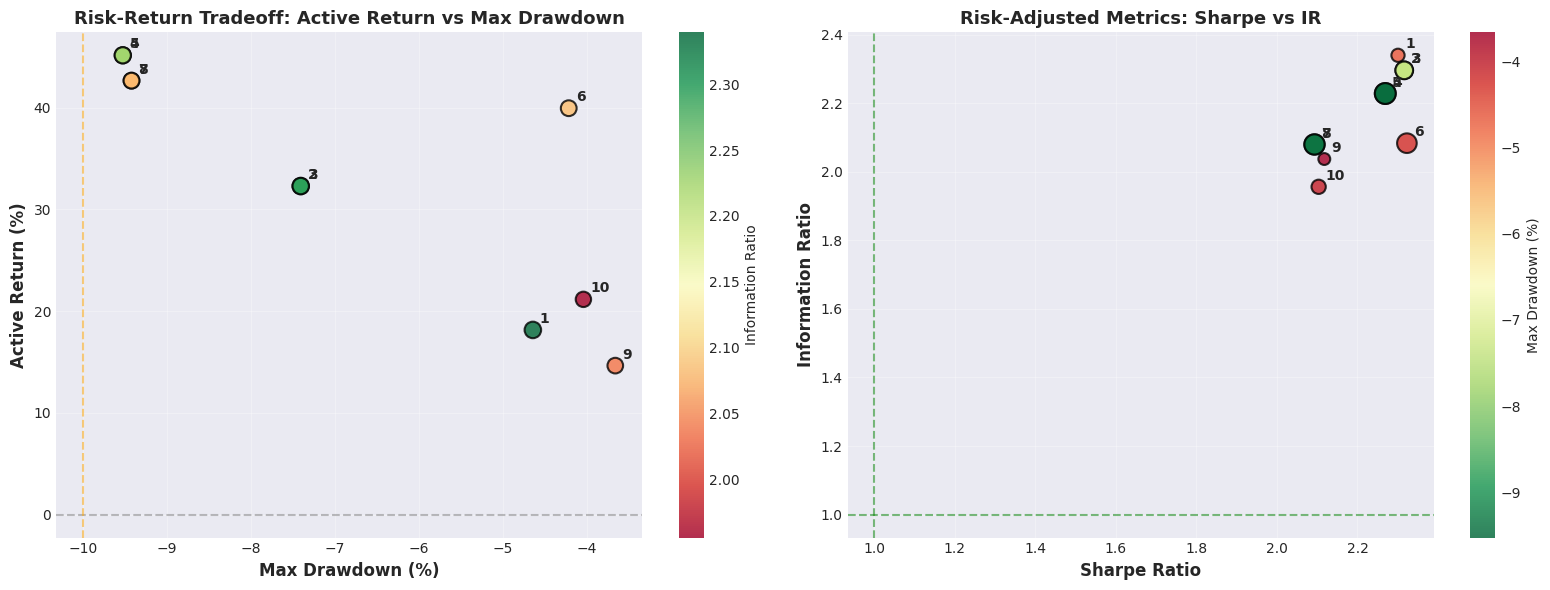


SCATTER PLOT LEGEND (Point Number -> Full Strategy Name):
----------------------------------------------------------------------------------------------------
   1. momentum_acceleration_long_lookback_days126_min_periods100_short_lookback_days63_top7_monthly
   2. momentum_acceleration_long_lookback_days126_min_periods50_short_lookback_days42_top5_monthly
   3. momentum_acceleration_long_lookback_days126_min_periods100_short_lookback_days42_top5_monthly
   4. momentum_acceleration_long_lookback_days126_min_periods50_short_lookback_days21_top3_monthly
   5. momentum_acceleration_long_lookback_days126_min_periods100_short_lookback_days21_top3_monthly
   6. momentum_lookback_days63_min_periods50_top5_monthly
   7. momentum_acceleration_long_lookback_days126_min_periods50_short_lookback_days42_top3_monthly
   8. momentum_acceleration_long_lookback_days126_min_periods100_short_lookback_days42_top3_monthly
   9. momentum_acceleration_long_lookback_days126_min_periods100_short_lookback_days6

In [13]:
# Risk-Return scatter: Active Return vs Max Drawdown
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Active Return vs Max Drawdown
scatter1 = ax1.scatter(top_strategies['1y_max_drawdown'] * 100, 
                       top_strategies['1y_active_return'] * 100,
                       s=top_strategies['composite_score'] * 50,  # Size by score
                       c=top_strategies['1y_information_ratio'],  # Color by IR
                       cmap='RdYlGn', alpha=0.8, edgecolors='black', linewidth=1.5)

# Add numbered labels (cleaner than full names)
for _, row in top_strategies.iterrows():
    ax1.annotate(f"{row['rank']}", 
                 (row['1y_max_drawdown'] * 100, row['1y_active_return'] * 100),
                 xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold')

ax1.set_xlabel('Max Drawdown (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Active Return (%)', fontsize=12, fontweight='bold')
ax1.set_title('Risk-Return Tradeoff: Active Return vs Max Drawdown', fontsize=13, fontweight='bold')
ax1.axhline(0, color='gray', linestyle='--', alpha=0.5)
ax1.axvline(-10, color='orange', linestyle='--', alpha=0.5)
ax1.grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Information Ratio', fontsize=10)

# Plot 2: Sharpe vs Information Ratio
scatter2 = ax2.scatter(top_strategies['1y_sharpe_ratio'], 
                       top_strategies['1y_information_ratio'],
                       s=top_strategies['1y_active_return'].abs() * 500,  # Size by active return
                       c=top_strategies['1y_max_drawdown'] * 100,  # Color by drawdown
                       cmap='RdYlGn_r', alpha=0.8, edgecolors='black', linewidth=1.5)

for _, row in top_strategies.iterrows():
    ax2.annotate(f"{row['rank']}", 
                 (row['1y_sharpe_ratio'], row['1y_information_ratio']),
                 xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold')

ax2.set_xlabel('Sharpe Ratio', fontsize=12, fontweight='bold')
ax2.set_ylabel('Information Ratio', fontsize=12, fontweight='bold')
ax2.set_title('Risk-Adjusted Metrics: Sharpe vs IR', fontsize=13, fontweight='bold')
ax2.axhline(1, color='green', linestyle='--', alpha=0.5, label='IR=1')
ax2.axvline(1, color='green', linestyle='--', alpha=0.5, label='Sharpe=1')
ax2.grid(True, alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label('Max Drawdown (%)', fontsize=10)

plt.tight_layout()
plt.show()

# Print legend below
print("\nSCATTER PLOT LEGEND (Point Number -> Full Strategy Name):")
print("-" * 100)
for _, row in top_strategies.iterrows():
    print(f"  {row['rank']:>2}. {row['config_name']}")

## Strategy Metrics Heatmap

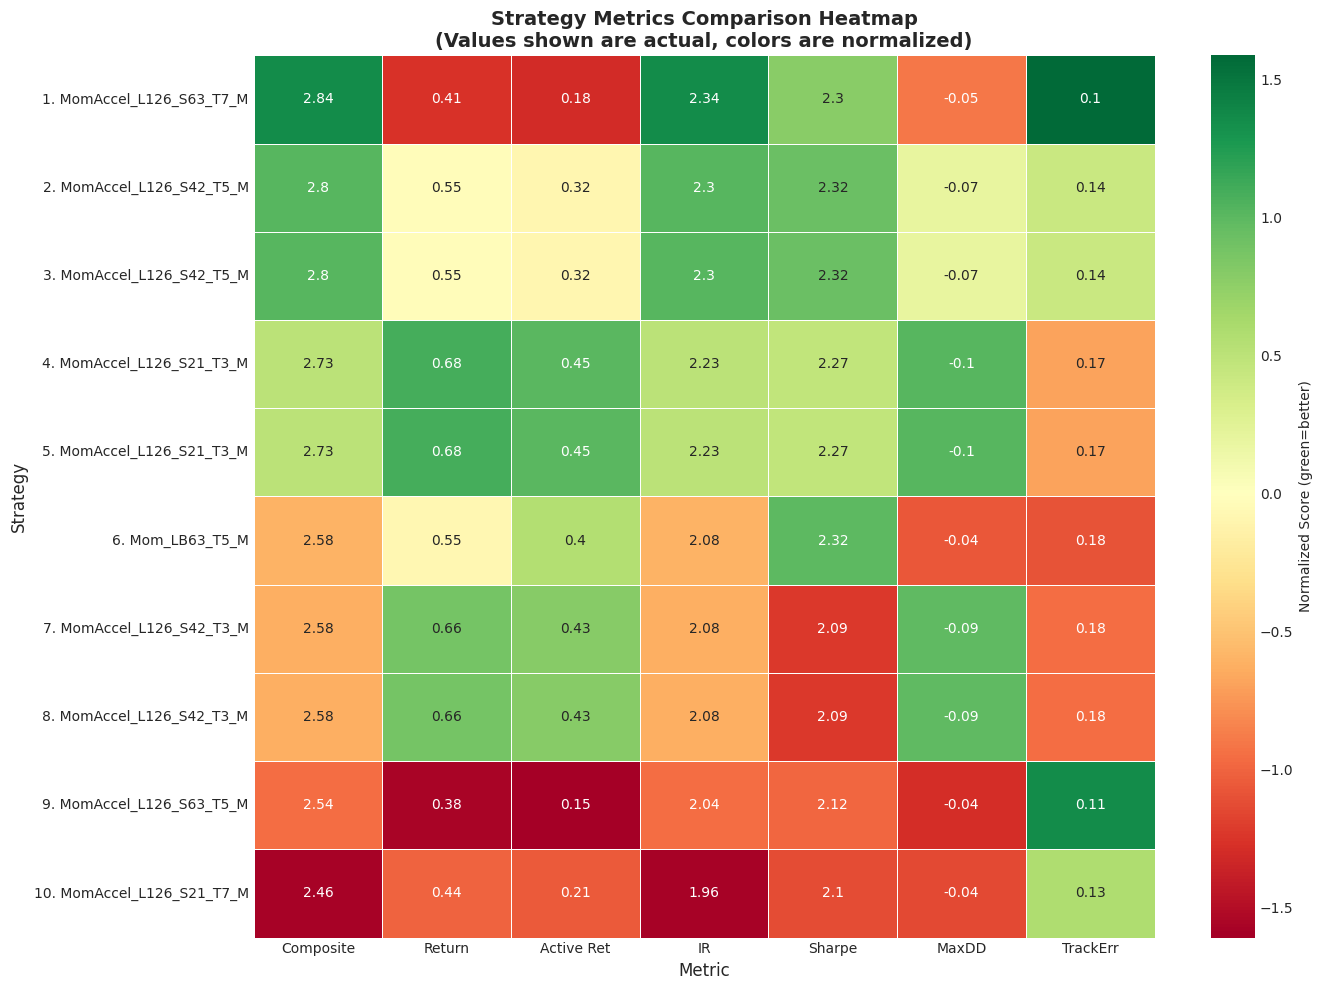


HEATMAP LEGEND (Row Number -> Full Strategy Name):
----------------------------------------------------------------------------------------------------
   1. momentum_acceleration_long_lookback_days126_min_periods100_short_lookback_days63_top7_monthly
   2. momentum_acceleration_long_lookback_days126_min_periods50_short_lookback_days42_top5_monthly
   3. momentum_acceleration_long_lookback_days126_min_periods100_short_lookback_days42_top5_monthly
   4. momentum_acceleration_long_lookback_days126_min_periods50_short_lookback_days21_top3_monthly
   5. momentum_acceleration_long_lookback_days126_min_periods100_short_lookback_days21_top3_monthly
   6. momentum_lookback_days63_min_periods50_top5_monthly
   7. momentum_acceleration_long_lookback_days126_min_periods50_short_lookback_days42_top3_monthly
   8. momentum_acceleration_long_lookback_days126_min_periods100_short_lookback_days42_top3_monthly
   9. momentum_acceleration_long_lookback_days126_min_periods100_short_lookback_days63_top5_

In [14]:
# Create normalized heatmap of all metrics
metrics_df = top_strategies[['label', 'composite_score', '1y_strategy_return', 
                              '1y_active_return', '1y_information_ratio', 
                              '1y_sharpe_ratio', '1y_max_drawdown', '1y_tracking_error']].copy()
metrics_df.set_index('label', inplace=True)
metrics_df.columns = ['Composite', 'Return', 'Active Ret', 'IR', 'Sharpe', 'MaxDD', 'TrackErr']

# Normalize for heatmap (z-scores)
metrics_normalized = metrics_df.copy()
for col in metrics_normalized.columns:
    metrics_normalized[col] = (metrics_normalized[col] - metrics_normalized[col].mean()) / metrics_normalized[col].std()

# For MaxDD and TrackErr, flip sign so green = better
metrics_normalized['MaxDD'] = -metrics_normalized['MaxDD']  # Less negative DD is better
metrics_normalized['TrackErr'] = -metrics_normalized['TrackErr']  # Lower TE can be better

plt.figure(figsize=(14, 10))
sns.heatmap(metrics_normalized, annot=metrics_df.round(2), fmt='', 
            cmap='RdYlGn', center=0, linewidths=0.5,
            cbar_kws={'label': 'Normalized Score (green=better)'})
plt.title('Strategy Metrics Comparison Heatmap\n(Values shown are actual, colors are normalized)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Strategy', fontsize=12)
plt.tight_layout()
plt.show()

# Print legend below
print("\nHEATMAP LEGEND (Row Number -> Full Strategy Name):")
print("-" * 100)
for _, row in top_strategies.iterrows():
    print(f"  {row['rank']:>2}. {row['config_name']}")

## Summary Statistics

In [15]:
# Print comprehensive summary table with FULL strategy names
print("=" * 140)
print("TOP 10 WINNING STRATEGIES - COMPREHENSIVE SUMMARY")
print("=" * 140)

# Create detailed table with all metrics
for _, row in top_strategies.iterrows():
    print(f"\n{'-'*140}")
    print(f"RANK {row['rank']}: {row['config_name']}")
    print(f"{'-'*140}")
    print(f"  Composite Score:    {row['composite_score']:.2f}")
    print(f"  Strategy Return:    {row['1y_strategy_return']*100:+.1f}%")
    print(f"  SPY Return:         {row['1y_spy_return']*100:.1f}%")
    print(f"  Active Return:      {row['1y_active_return']*100:+.1f}%")
    print(f"  Information Ratio:  {row['1y_information_ratio']:.2f}")
    print(f"  Sharpe Ratio:       {row['1y_sharpe_ratio']:.2f}")
    print(f"  Max Drawdown:       {row['1y_max_drawdown']*100:.1f}%")
    print(f"  Tracking Error:     {row['1y_tracking_error']*100:.1f}%")
    print(f"  Num Rebalances:     {row['1y_num_rebalances']:.0f}")

print(f"\n{'='*140}")
print("KEY INSIGHTS")
print("=" * 140)

# Analyze patterns
mom_accel_count = sum(1 for n in top_strategies['config_name'] if 'momentum_acceleration' in n)
monthly_count = sum(1 for n in top_strategies['config_name'] if '_monthly' in n)
weekly_count = sum(1 for n in top_strategies['config_name'] if '_weekly' in n)

print(f"\n1. ALPHA MODEL DISTRIBUTION:")
print(f"   - Momentum Acceleration: {mom_accel_count}/{TOP_N} strategies")
print(f"   - Other models: {TOP_N - mom_accel_count}/{TOP_N} strategies")

print(f"\n2. REBALANCE FREQUENCY:")
print(f"   - Monthly: {monthly_count}/{TOP_N} strategies")
print(f"   - Weekly: {weekly_count}/{TOP_N} strategies")

print(f"\n3. PERFORMANCE RANGES:")
print(f"   - Active Return: {top_strategies['1y_active_return'].min()*100:.1f}% to {top_strategies['1y_active_return'].max()*100:.1f}%")
print(f"   - Information Ratio: {top_strategies['1y_information_ratio'].min():.2f} to {top_strategies['1y_information_ratio'].max():.2f}")
print(f"   - Sharpe Ratio: {top_strategies['1y_sharpe_ratio'].min():.2f} to {top_strategies['1y_sharpe_ratio'].max():.2f}")
print(f"   - Max Drawdown: {top_strategies['1y_max_drawdown'].min()*100:.1f}% to {top_strategies['1y_max_drawdown'].max()*100:.1f}%")

# Best strategy summary
best = top_strategies.iloc[0]
print(f"\n4. TOP STRATEGY (#1) DETAILS:")
print(f"   - Full Name: {best['config_name']}")
print(f"   - Composite Score: {best['composite_score']:.2f}")
print(f"   - Strategy Return: {best['1y_strategy_return']*100:.1f}%")
print(f"   - Active Return: {best['1y_active_return']*100:.1f}%")
print(f"   - Information Ratio: {best['1y_information_ratio']:.2f}")
print(f"   - Max Drawdown: {best['1y_max_drawdown']*100:.1f}%")

TOP 10 WINNING STRATEGIES - COMPREHENSIVE SUMMARY

--------------------------------------------------------------------------------------------------------------------------------------------
RANK 1: momentum_acceleration_long_lookback_days126_min_periods100_short_lookback_days63_top7_monthly
--------------------------------------------------------------------------------------------------------------------------------------------
  Composite Score:    2.84
  Strategy Return:    +41.3%
  SPY Return:         23.2%
  Active Return:      +18.2%
  Information Ratio:  2.34
  Sharpe Ratio:       2.30
  Max Drawdown:       -4.6%
  Tracking Error:     10.4%
  Num Rebalances:     18

--------------------------------------------------------------------------------------------------------------------------------------------
RANK 2: momentum_acceleration_long_lookback_days126_min_periods50_short_lookback_days42_top5_monthly
--------------------------------------------------------------------------

## Export Summary

In [16]:
# Export top 10 to CSV for easy reference
export_df = top_strategies[['config_name', 'short_name', 'composite_score', 
                             '1y_strategy_return', '1y_spy_return', '1y_active_return',
                             '1y_information_ratio', '1y_sharpe_ratio', '1y_max_drawdown',
                             '1y_tracking_error', '1y_num_rebalances']].copy()

export_path = winners_file.parent / 'top10_strategies.csv'
export_df.to_csv(export_path, index=False)
print(f"Top 10 strategies exported to: {export_path}")

Top 10 strategies exported to: ../artifacts/optimization/20260124_044939/top10_strategies.csv
